In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

% matplotlib inline

In [2]:
data = [{'name': 'Mr. Dangly', 'difficulty': 2, 'animal': 1},
        {'name': '"Mr. Tricky"', 'difficulty': 3, 'animal': 1},
        {'name': '"Easy Jumper"', 'difficulty': 2, 'animal': 0},
       {'name': '"Tricky Gloves"', 'difficulty': 3, 'animal': 0}]

df = pd.DataFrame(data)

In [3]:
df

,animal,difficulty,name
0,1,2,Mr. Dangly
1,1,3,"""Mr. Tricky"""
2,0,2,"""Easy Jumper"""
3,0,3,"""Tricky Gloves"""


In [4]:
for name, y, x in [i.values() for i in data]:
    print (name, x, y)

Mr. Dangly 2 1
"Mr. Tricky" 3 1
"Easy Jumper" 2 0
"Tricky Gloves" 3 0


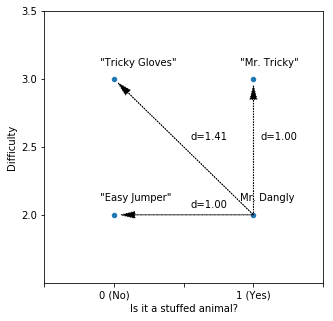

In [7]:
df.plot(kind='scatter', x='animal', y='difficulty', figsize=(5,5))
axes = plt.gca()

axes.set_xlim([-0.5,1.5])
plt.xticks([-0.5, 0, 0.5, 1, 1.5], ['', '0 (No)', '', '1 (Yes)', ''])
plt.xlabel('Is it a stuffed animal?')

axes.set_ylim([1.5,3.5])
plt.yticks([i/2 for i in range(4, 8)])
plt.ylabel('Difficulty')

for i in [(-0.85, 0), (-0.9, 0.9), (0, 0.85)]:
    plt.arrow(1, 2, i[0], i[1],
             head_width=0.05, 
              head_length=0.1, 
              fc='k', 
              ec='k',
              linestyle=':')

for name, y, x in [i.values() for i in data]:
    plt.annotate(name, xy=(x - 0.1, y + 0.1))
    
for name, y, x in [i.values() for i in data][1:]:
    origin = np.array([(1, 2)]).reshape(1, -1)
    distance = pairwise_distances(origin, np.array([(x, y)]).reshape(1, -1), 'euclidean')[0][0]
    distance_string = 'd=%.2f' % round(distance, 2)
    plt.annotate(distance_string, xy=((x + 1.1)/2, (y + 2.1)/2))

plt.savefig('distances.png')
plt.show()